# Mnist

In [0]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 1.3MB/s 
     |████████████████████████████████| 3.8MB 37.0MB/s 
     |████████████████████████████████| 450kB 46.5MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0'

### MNIST 데이터셋 로딩.

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
print('========================================')
print('x_train details')
print('========================================')
print('Rank of x_train: ',x_train.ndim)
print('len of x_train: ', len(x_train))
print('Shapeof 0th index of x_train: ',x_train[0].shape)
print('Shape of x_train: ',x_train.shape)


print()

print('========================================')
print('y_train details')
print('========================================')
print('Rank of y_train: ',y_train.ndim)
print('len of y_train: ', len(y_train))
print('Shape of y_train: ',y_train.shape)

x_train details
Rank of x_train:  3
len of x_train:  60000
Shapeof 0th index of x_train:  (28, 28)
Shape of x_train:  (60000, 28, 28)

y_train details
Rank of y_train:  1
len of y_train:  60000
Shape of y_train:  (60000,)


### MNIT 이미지 화면 출력

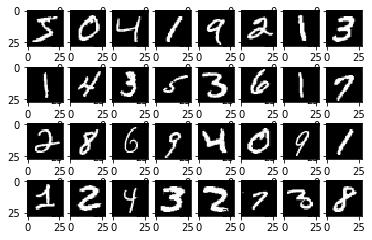

In [0]:
from matplotlib import pyplot

for i in range(0, 32):
  pyplot.subplot(4, 8, i + 1)
  pyplot.imshow(x_train[i], cmap='gray')

### 데이터 정규화, Normalization (0 < x < 1, 정수를 실수로 변환):

In [0]:
x_train = x_train / 255.0
x_test  = x_test / 255.0

In [0]:
x_train[:3, 10:15, 10:15]

array([[[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
        [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
        [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
        [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
        [0.        , 0.        , 0.        , 0.31764706, 0.94117647]],

       [[0.93333333, 0.98823529, 0.98823529, 0.70196078, 0.04705882],
        [0.99215686, 0.91372549, 0.81568627, 0.32941176, 0.        ],
        [0.94117647, 0.27843137, 0.0745098 , 0.10980392, 0.        ],
        [0.24705882, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.19215

### 신경망 레이어를 쌓아서 tensorflow.keras.Sequential 모델 작성.

In [0]:
from tensorflow.keras.models import Sequential

model = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(196, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 요약

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               153860    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1970      
Total params: 155,830
Trainable params: 155,830
Non-trainable params: 0
_________________________________________________________________


### 모델 학습과 평가하기

In [0]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2394 - accuracy: 0.9311
Epoch 2/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1020 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0689 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0496 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0380 - accuracy: 0.9883
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06994909679470583, 0.9774]

### 약 98% 정확도로 이미지 분류 수행.

In [0]:
import numpy as np

# Argmax: Returns the indices of the maximum values along an axis.
np.argmax(model.predict([[x_train[0]]]))

5